¡Hola, Edghar!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Edghar! Has hecho un excelente trabajo con el proyecto, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas d ehipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math





<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Cargar datos

In [11]:
# Carga los archivos de datos en diferentes DataFrames

users = pd.read_csv("/datasets/megaline_users.csv")
calls = pd.read_csv("/datasets/megaline_calls.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")


print(users.head())
print(calls.head())
print(messages.head())
print(internet.head())
print(plans.head())



print(users.info())
print(calls.info())
print(messages.info())
print(internet.info())
print(plans.info())



   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
         id  user_id message_date
0  10

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
import pandas as pd
plans = pd.read_csv("/datasets/megaline_plans.csv")

print(plans.info())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [12]:
# Imprime una muestra de los datos para las tarifas
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

* El archivo no cuenta con valores nulos y los datos paracen estar bien estructurados.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
print("NA")

NA


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.] * Podemos optar por convertir los MB consumidos por GB para llegar a una consistencia con los limites del plan (ambos planes esta descritos en GB).


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

## Usuarios/as

In [18]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
import pandas as pd
users = pd.read_csv("/datasets/megaline_users.csv")

print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [16]:
# Imprime una muestra de datos para usuarios

print(users.head())



   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

* La columna "red_date" y "churn_date" se encuentra como object pero debemos cambiarlos a datatime.
* La columna "churn_date tiene solo 34 valores de 500 (bastantes valores nulos)

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [3]:
import pandas as pd

users = pd.read_csv("/datasets/megaline_users.csv")

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d', errors='coerce')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d', errors='coerce')  # ← Conserva NaT para usuarios activos

print(users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None



<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [29]:
print("NA")

NA


## Llamadas

In [36]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

import pandas as pd
calls = pd.read_csv("/datasets/megaline_calls.csv")

print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [35]:
# Imprime una muestra de datos para las llamadas

print(calls.head())

         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*No se visualizan valores nulos solamente fue necesario cambiar de formato a la columna "call_date" (formato texto a Fecha)


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [37]:
import pandas as pd
calls = pd.read_csv("/datasets/megaline_calls.csv")

calls['call_date'] = pd.to_datetime(calls['call_date'], errors='coerce')

print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [4]:
print("Las llamadas con duracion de 0 podrian ser llamadas fallidas o cortadas inmediatamente")

Las llamadas con duracion de 0 podrian ser llamadas fallidas o cortadas inmediatamente


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Mensajes

In [39]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
import pandas as pd
messages = pd.read_csv("/datasets/megaline_messages.csv")

print(messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [40]:
# Imprime una muestra de datos para los mensajes

print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

* Mismo caso que los puntos anteriores cambiaremos el formato de "message_date".

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [41]:
import pandas as pd
messages = pd.read_csv("/datasets/megaline_messages.csv")

messages['message_date'] = pd.to_datetime(messages['message_date'], errors='coerce')

print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [42]:
print("NA")

NA


## Internet

In [43]:
# Imprime la información general/resumida sobre el DataFrame de internet

import pandas as pd
internet = pd.read_csv("/datasets/megaline_internet.csv")

print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [44]:
# Imprime una muestra de datos para el tráfico de internet

print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

* mismo caso anterior

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
import pandas as pd
import math 

internet = pd.read_csv("/datasets/megaline_internet.csv")

internet['session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')

internet['gb_used'] = internet['mb_used'].apply(
    lambda x: math.ceil(x / 1024)  
)

print("\nResumen de datos transformados:")
print(internet[['mb_used', 'gb_used']].head(3))  
print(f"\nRegistros con redondeo superior (ej: 1.01 GB → 2 GB):")
print(internet[internet['mb_used'] % 1024 != 0].sample(3))


Resumen de datos transformados:
   mb_used  gb_used
0    89.86        1
1     0.00        0
2   660.40        1

Registros con redondeo superior (ej: 1.01 GB → 2 GB):
              id  user_id session_date  mb_used  gb_used
102540  1490_355     1490   2018-07-30    39.57        1
63320    1292_24     1292   2018-10-07   865.70        1
39641   1178_381     1178   2018-12-07   568.59        1


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [46]:
print("NA")

NA


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [47]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(plans.head())

print(plans.info())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   pla

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [9]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

import pandas as pd

calls = pd.read_csv("/datasets/megaline_calls.csv")

calls['call_date'] = pd.to_datetime(calls['call_date'], errors='coerce')

pivot_calls = calls.pivot_table(
    index=['user_id', pd.Grouper(key='call_date', freq='M')],  
    values=['duration'],                                      
    aggfunc=['sum', 'count'],                                
    fill_value=0                                           
).reset_index()

pivot_calls.columns = ['user_id', 'month', 'total_minutes', 'calls_count']

pivot_calls['month'] = pivot_calls['month'].dt.to_period('M')

print(pivot_calls.head())


   user_id    month  total_minutes  calls_count
0     1000  2018-12         116.83           16
1     1001  2018-08         171.14           27
2     1001  2018-09         297.69           49
3     1001  2018-10         374.11           65
4     1001  2018-11         404.59           64



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

In [49]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutes_agg = calls.groupby(['user_id', pd.Grouper(key='call_date', freq='M')])['duration'].sum().reset_index(name='total_minutes')
minutes_agg['month'] = minutes_agg['call_date'].dt.to_period('M')

print(minutes_agg.head())


   user_id  call_date  total_minutes    month
0     1000 2018-12-31         116.83  2018-12
1     1001 2018-08-31         171.14  2018-08
2     1001 2018-09-30         297.69  2018-09
3     1001 2018-10-31         374.11  2018-10
4     1001 2018-11-30         404.59  2018-11


In [50]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

messages_agg = messages.groupby(['user_id', pd.Grouper(key='message_date', freq='M')])['id'].count().reset_index(name='total_messages')
messages_agg['month'] = messages_agg['message_date'].dt.to_period('M')

print(messages_agg.head())



   user_id message_date  total_messages    month
0     1000   2018-12-31              11  2018-12
1     1001   2018-08-31              30  2018-08
2     1001   2018-09-30              44  2018-09
3     1001   2018-10-31              53  2018-10
4     1001   2018-11-30              36  2018-11


In [51]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_agg = internet.groupby(['user_id', pd.Grouper(key='session_date', freq='M')])['mb_used'].sum().reset_index(name='total_mb')
internet_agg['month'] = internet_agg['session_date'].dt.to_period('M')

print(internet_agg.head())

   user_id session_date  total_mb    month
0     1000   2018-12-31   1901.47  2018-12
1     1001   2018-08-31   6919.15  2018-08
2     1001   2018-09-30  13314.82  2018-09
3     1001   2018-10-31  22330.49  2018-10
4     1001   2018-11-30  18504.30  2018-11


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [52]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

df_agg = calls_agg.merge(minutes_agg, on=['user_id', 'month'], how='outer')
df_agg = df_agg.merge(messages_agg, on=['user_id', 'month'], how='outer')
df_agg = df_agg.merge(internet_agg, on=['user_id', 'month'], how='outer')

print(df_agg.head())

   user_id call_date_x  calls_count    month call_date_y  total_minutes  \
0     1000  2018-12-31         16.0  2018-12  2018-12-31         116.83   
1     1001  2018-08-31         27.0  2018-08  2018-08-31         171.14   
2     1001  2018-09-30         49.0  2018-09  2018-09-30         297.69   
3     1001  2018-10-31         65.0  2018-10  2018-10-31         374.11   
4     1001  2018-11-30         64.0  2018-11  2018-11-30         404.59   

  message_date  total_messages session_date  total_mb  
0   2018-12-31            11.0   2018-12-31   1901.47  
1   2018-08-31            30.0   2018-08-31   6919.15  
2   2018-09-30            44.0   2018-09-30  13314.82  
3   2018-10-31            53.0   2018-10-31  22330.49  
4   2018-11-30            36.0   2018-11-30  18504.30  


In [53]:
# Añade la información de la tarifa

df_agg = df_agg.merge(users[['user_id', 'plan']], on='user_id', how='left')
f_agg = df_agg.merge(plans, left_on='plan', right_on='plan_name', how='left')

print(df_agg.head())

   user_id call_date_x  calls_count    month call_date_y  total_minutes  \
0     1000  2018-12-31         16.0  2018-12  2018-12-31         116.83   
1     1001  2018-08-31         27.0  2018-08  2018-08-31         171.14   
2     1001  2018-09-30         49.0  2018-09  2018-09-30         297.69   
3     1001  2018-10-31         65.0  2018-10  2018-10-31         374.11   
4     1001  2018-11-30         64.0  2018-11  2018-11-30         404.59   

  message_date  total_messages session_date  total_mb      plan  
0   2018-12-31            11.0   2018-12-31   1901.47  ultimate  
1   2018-08-31            30.0   2018-08-31   6919.15      surf  
2   2018-09-30            44.0   2018-09-30  13314.82      surf  
3   2018-10-31            53.0   2018-10-31  22330.49      surf  
4   2018-11-30            36.0   2018-11-30  18504.30      surf  


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [1]:
# Calcula el ingreso mensual para cada usuario

import pandas as pd
import math

users = pd.read_csv("/datasets/megaline_users.csv")
calls = pd.read_csv("/datasets/megaline_calls.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")

calls['call_date'] = pd.to_datetime(calls['call_date'], errors='coerce')
messages['message_date'] = pd.to_datetime(messages['message_date'], errors='coerce')
internet['session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')

calls_agg = calls.groupby(['user_id', pd.Grouper(key='call_date', freq='M')]).agg(
    total_minutes=('duration', lambda x: sum(math.ceil(val) for val in x)),  
    calls_count=('duration', 'count')
).reset_index()

messages_agg = messages.groupby(['user_id', pd.Grouper(key='message_date', freq='M')]).agg(
    total_messages=('id', 'count')
).reset_index()

internet['gb_used'] = internet['mb_used'].apply(lambda x: math.ceil(x / 1024))  
internet_agg = internet.groupby(['user_id', pd.Grouper(key='session_date', freq='M')]).agg(
    total_gb=('gb_used', 'sum')
).reset_index()

df_agg = users[['user_id', 'plan']].copy()
df_agg = df_agg.merge(
    calls_agg.rename(columns={'call_date': 'month'}),
    on=['user_id'],
    how='left'
).merge(
    messages_agg.rename(columns={'message_date': 'month'}),
    on=['user_id', 'month'],
    how='left'
).merge(
    internet_agg.rename(columns={'session_date': 'month'}),
    on=['user_id', 'month'],
    how='left'
)

df_agg.fillna({
    'total_minutes': 0,
    'calls_count': 0,
    'total_messages': 0,
    'total_gb': 0
}, inplace=True)

print("DataFrame consolidado creado:")
print(df_agg.head())

DataFrame consolidado creado:
   user_id      plan      month  total_minutes  calls_count  total_messages  \
0     1000  ultimate 2018-12-31          124.0         16.0            11.0   
1     1001      surf 2018-08-31          182.0         27.0            30.0   
2     1001      surf 2018-09-30          315.0         49.0            44.0   
3     1001      surf 2018-10-31          393.0         65.0            53.0   
4     1001      surf 2018-11-30          426.0         64.0            36.0   

   total_gb  
0       4.0  
1      21.0  
2      41.0  
3      50.0  
4      49.0  


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Solamente para hacer el calculo debemos de considerar los excedentes en cada una de las variables y los costos de cada uno de los planes


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

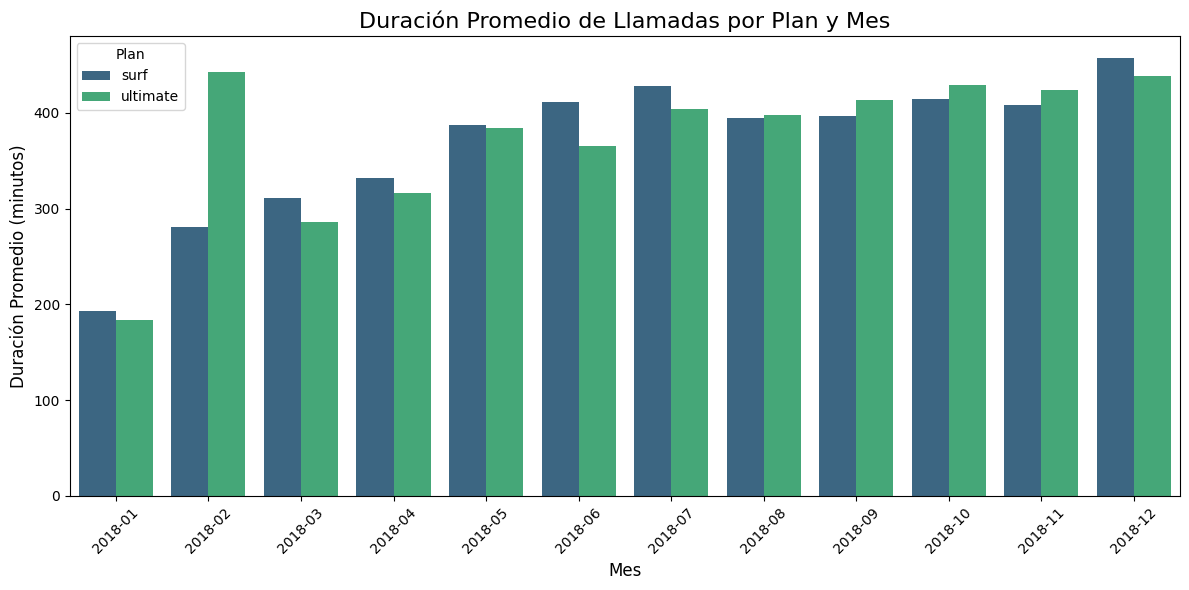

In [62]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

import matplotlib.pyplot as plt
import seaborn as sns

avg_duration_by_plan_month = df_agg.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_duration_by_plan_month, x='month', y='total_minutes', hue='plan', palette='viridis')

plt.title('Duración Promedio de Llamadas por Plan y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Duración Promedio (minutos)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plan')

plt.tight_layout()
plt.show()

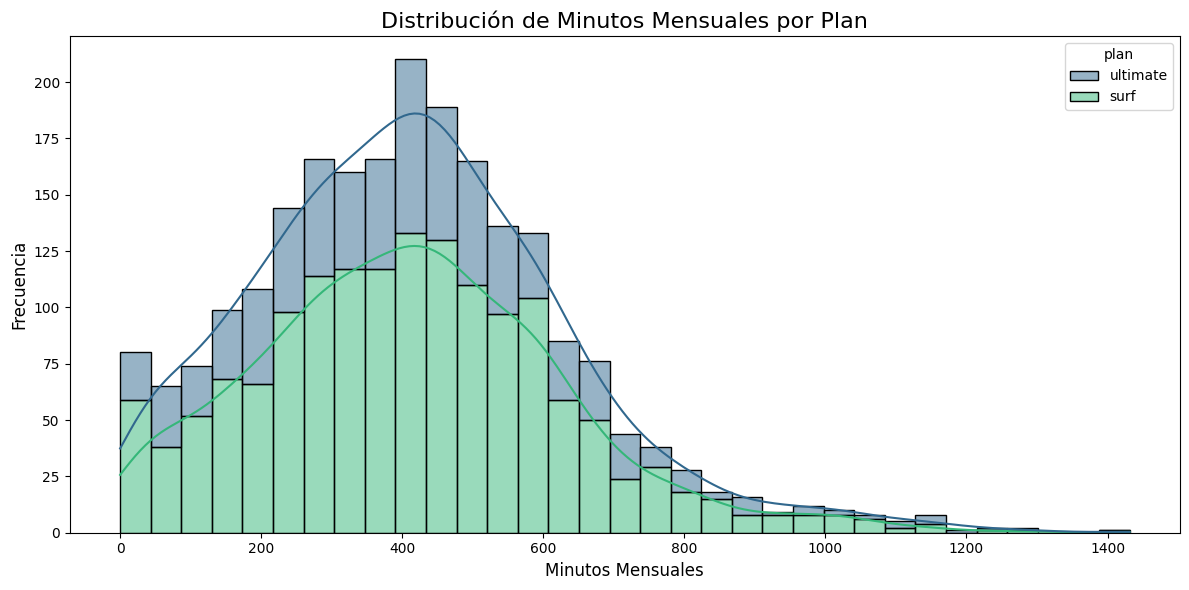

In [63]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(12, 6))

sns.histplot(data=df_agg, x='total_minutes', hue='plan', kde=True, multiple='stack', palette='viridis')

plt.title('Distribución de Minutos Mensuales por Plan', fontsize=16)
plt.xlabel('Minutos Mensuales', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.tight_layout()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [65]:
# Calcula la media y la varianza de la duración mensual de llamadas.

mean_minutes = df_agg['total_minutes'].mean()
variance_minutes = df_agg['total_minutes'].var()

print(f'Media de minutos mensuales de llamadas: {mean_minutes:.2f} minutos')
print(f'Varianza de minutos mensuales de llamadas: {variance_minutes:.2f} minutos²')

Media de minutos mensuales de llamadas: 411.49 minutos
Varianza de minutos mensuales de llamadas: 48088.30 minutos²


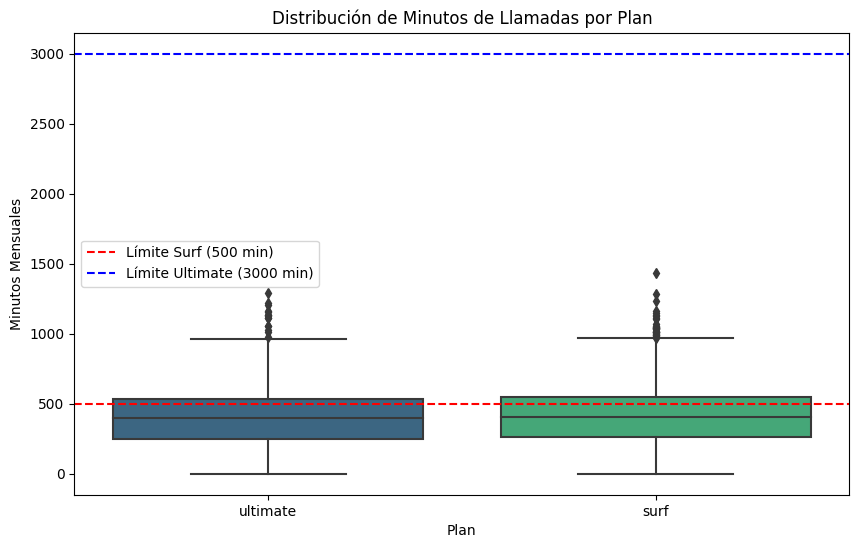

In [13]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

users = pd.read_csv("/datasets/megaline_users.csv")
calls = pd.read_csv("/datasets/megaline_calls.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")

calls['call_date'] = pd.to_datetime(calls['call_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])


calls_agg = calls.groupby(['user_id', pd.Grouper(key='call_date', freq='M')])['duration'].sum().reset_index()
calls_agg.rename(columns={'duration': 'total_minutes'}, inplace=True)

df_agg = calls_agg.merge(users[['user_id', 'plan']], on='user_id', how='left')


plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_agg,
    x='plan',
    y='total_minutes',
    palette='viridis',
    showfliers=True
)
plt.title('Distribución de Minutos de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Minutos Mensuales')

plt.axhline(y=500, color='red', linestyle='--', label='Límite Surf (500 min)')
plt.axhline(y=3000, color='blue', linestyle='--', label='Límite Ultimate (3000 min)')
plt.legend()

plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

* Podemos visualizar que el consumo promedio es menor de 500 minutos lo que significa que a la mayoria de los usuarios les conviene el plan Surf (Se ahorrarian 50 USD de pago mensual).

### Mensajes


Estadísticas descriptivas:
               mean   50%    max
plan                            
surf      40.109656  32.0  266.0
ultimate  46.296233  41.0  166.0


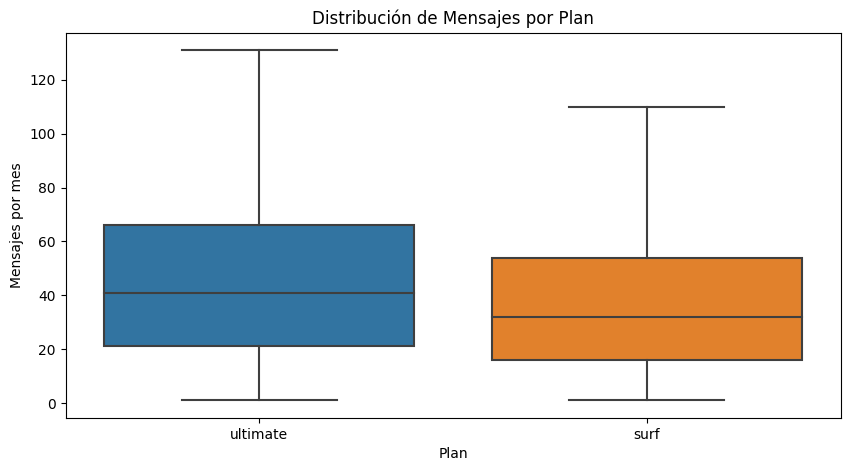


Porcentaje que excede límites:
- Surf: 27.8% excede 50 mensajes
- Ultimate: 0.0% excede 1000 mensajes


In [15]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

import pandas as pd
messages = pd.read_csv("/datasets/megaline_messages.csv")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

users = pd.read_csv("/datasets/megaline_users.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")

messages['message_date'] = pd.to_datetime(messages['message_date'])
users['plan'] = users['plan'].str.lower()  

messages_agg = messages.groupby([
    'user_id',
    pd.Grouper(key='message_date', freq='M')
]).size().reset_index(name='total_messages')

df_analysis = messages_agg.merge(users[['user_id', 'plan']], on='user_id')

print("\nEstadísticas descriptivas:")
print(df_analysis.groupby('plan')['total_messages'].describe()[['mean', '50%', 'max']])

plt.figure(figsize=(10, 5))
sns.boxplot(x='plan', y='total_messages', data=df_analysis, showfliers=False)
plt.title('Distribución de Mensajes por Plan')
plt.ylabel('Mensajes por mes')
plt.xlabel('Plan')
plt.show()

print("\nPorcentaje que excede límites:")
for plan in ['surf', 'ultimate']:
    limite = plans.loc[plans['plan_name'] == plan, 'messages_included'].values[0]
    excede = (df_analysis[df_analysis['plan'] == plan]['total_messages'] > limite).mean()
    print(f"- {plan.title()}: {excede:.1%} excede {limite} mensajes")



In [17]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

internet = pd.read_csv("/datasets/megaline_internet.csv")
users = pd.read_csv("/datasets/megaline_users.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")

internet['session_date'] = pd.to_datetime(internet['session_date'])

internet_agg = internet.groupby(['user_id', pd.Grouper(key='session_date', freq='M')])['mb_used'].sum().reset_index()
internet_agg['gb_used'] = internet_agg['mb_used'] / 1024  
internet_agg['gb_used'] = internet_agg['gb_used'].apply(lambda x: round(x, 2))  

df_internet = internet_agg.merge(users[['user_id', 'plan']], on='user_id')

stats_internet = df_internet.groupby('plan')['gb_used'].agg(['mean', 'median', 'std', 'max'])
print(stats_internet)

print(plans[['plan_name', 'mb_per_month_included']].assign(gb_included=lambda x: x['mb_per_month_included']/1024))

               mean  median       std    max
plan                                        
surf      16.325931   16.53  7.699979  69.27
ultimate  16.834645   16.47  7.647426  45.50
  plan_name  mb_per_month_included  gb_included
0      surf                  15360         15.0
1  ultimate                  30720         30.0


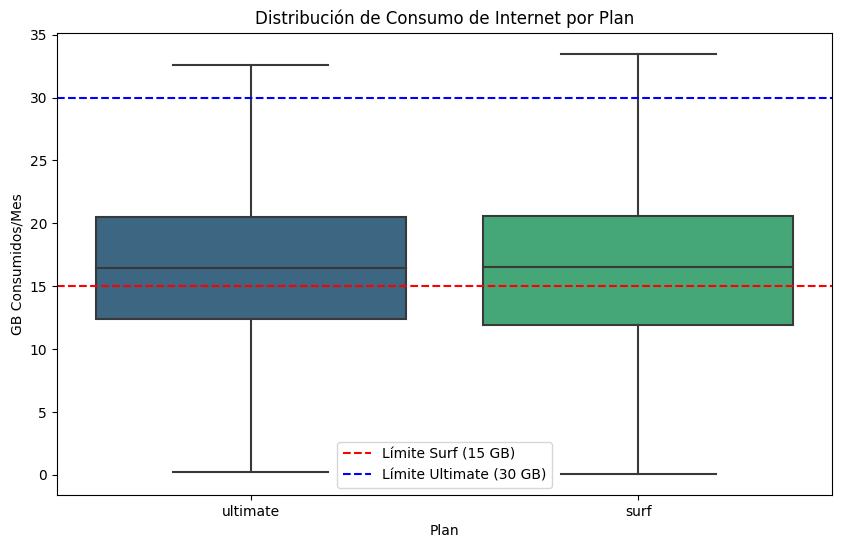

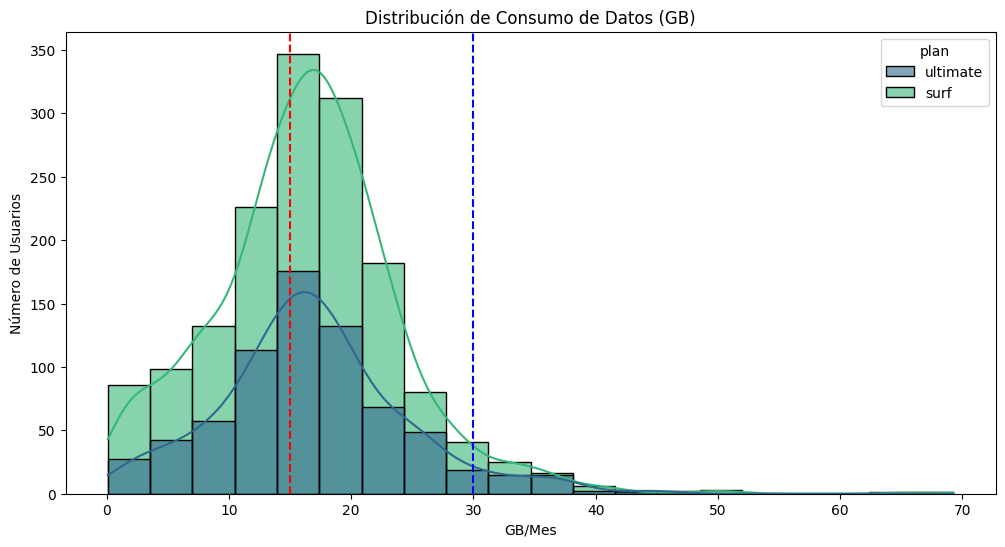

Surf: 58.5% de usuarios excede 15 GB
Ultimate: 5.7% de usuarios excede 30 GB
      user_id session_date   mb_used  gb_used  plan  gb_excedidos  month
1752     1379   2018-12-31  70931.59    69.27  surf         54.27     12
569      1121   2018-12-31  66863.89    65.30  surf         50.30     12
1359     1292   2018-12-31  52034.66    50.82  surf         35.82     12
1355     1292   2018-08-31  51809.35    50.60  surf         35.60      8
1126     1240   2018-08-31  49950.58    48.78  surf         33.78      8


In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_internet,
    x='plan',
    y='gb_used',
    palette='viridis',
    showfliers=False 
)
plt.axhline(y=15, color='red', linestyle='--', label='Límite Surf (15 GB)')
plt.axhline(y=30, color='blue', linestyle='--', label='Límite Ultimate (30 GB)')
plt.title('Distribución de Consumo de Internet por Plan')
plt.ylabel('GB Consumidos/Mes')
plt.xlabel('Plan')
plt.legend()
plt.show()



plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_internet,
    x='gb_used',
    hue='plan',
    bins=20,
    kde=True,
    palette='viridis',
    alpha=0.6
)
plt.axvline(x=15, color='red', linestyle='--')
plt.axvline(x=30, color='blue', linestyle='--')
plt.title('Distribución de Consumo de Datos (GB)')
plt.xlabel('GB/Mes')
plt.ylabel('Número de Usuarios')
plt.show()



df_internet['gb_excedidos'] = df_internet.apply(
    lambda row: max(0, row['gb_used'] - plans.loc[plans['plan_name'] == row['plan'], 'mb_per_month_included'].values[0]/1024),
    axis=1
)


for plan in ['surf', 'ultimate']:
    limite = plans.loc[plans['plan_name'] == plan, 'mb_per_month_included'].values[0]/1024
    porcentaje = (df_internet[df_internet['plan'] == plan]['gb_excedidos'] > 0).mean() * 100
    print(f"{plan.title()}: {porcentaje:.1f}% de usuarios excede {limite:.0f} GB")
    
    

print(df_internet.sort_values('gb_used', ascending=False).head(5))


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

* Con respecto a los mensajes el 27.8% de los usuarios de "Surf" excenden los 50 mensajes en comparacion del 0.0% de los usuarios "Ultimate". Podemos recomendar que prueben el cambiarse a "Ultimate".

### Internet

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

* Podemos visualizar que el 58.5% de los usuarios exceden los 15 GB, lo cual podemos deducir que los usuarios podrian optar por cambiarse al plan Ultimate

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [26]:
df_internet = internet.groupby(['user_id', pd.Grouper(key='session_date', freq='M')])['mb_used'].sum().reset_index()
df_internet['gb_used'] = df_internet['mb_used'] / 1024  
df_internet = df_internet.merge(users[['user_id', 'plan']], on='user_id')  

stats = df_internet.groupby('plan')['gb_used'].describe()[['mean', '50%', 'std', 'max']]
print(stats)

               mean        50%       std        max
plan                                               
surf      16.325881  16.527178  7.699886  69.269131
ultimate  16.834612  16.468213  7.647479  45.503252


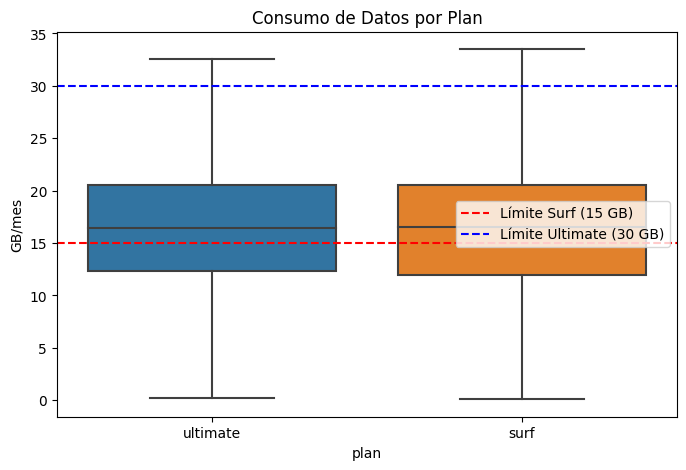

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_internet, x='plan', y='gb_used', showfliers=False)
plt.axhline(y=15, color='red', linestyle='--', label='Límite Surf (15 GB)')
plt.axhline(y=30, color='blue', linestyle='--', label='Límite Ultimate (30 GB)')
plt.title('Consumo de Datos por Plan')
plt.ylabel('GB/mes')
plt.legend()
plt.show()

In [29]:
for plan in ['surf', 'ultimate']:
    limite = 15 if plan == 'surf' else 30
    exceden = (df_internet[df_internet['plan'] == plan]['gb_used'] > limite).mean() * 100
    print(f"{plan.title()}: {exceden:.1f}% excede {limite} GB")

Surf: 58.5% excede 15 GB
Ultimate: 5.7% excede 30 GB


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [21]:
# Prueba las hipótesis

import pandas as pd
import math

users = pd.read_csv("/datasets/megaline_users.csv")
calls = pd.read_csv("/datasets/megaline_calls.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")

calls['call_date'] = pd.to_datetime(calls['call_date'], errors='coerce')
messages['message_date'] = pd.to_datetime(messages['message_date'], errors='coerce')
internet['session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')


calls_agg = calls.groupby(['user_id', pd.Grouper(key='call_date', freq='M')]).agg(
    total_minutes=('duration', lambda x: sum(math.ceil(val) for val in x)),
    calls_count=('id', 'count')
).reset_index()

messages_agg = messages.groupby(['user_id', pd.Grouper(key='message_date', freq='M')]).agg(
    total_messages=('id', 'count')
).reset_index()

internet['gb_used'] = internet['mb_used'].apply(lambda x: math.ceil(x/1024))
internet_agg = internet.groupby(['user_id', pd.Grouper(key='session_date', freq='M')]).agg(
    total_gb=('gb_used', 'sum')
).reset_index()

df_agg = users[['user_id', 'plan']].copy()
df_agg = df_agg.merge(
    calls_agg.rename(columns={'call_date': 'month'}),
    on='user_id',
    how='left'
).merge(
    messages_agg.rename(columns={'message_date': 'month'}),
    on=['user_id', 'month'],
    how='left'
).merge(
    internet_agg.rename(columns={'session_date': 'month'}),
    on=['user_id', 'month'],
    how='left'
)

df_agg.fillna({
    'total_minutes': 0,
    'calls_count': 0,
    'total_messages': 0,
    'total_gb': 0
}, inplace=True)

print("DataFrame df_agg creado exitosamente:")
print(df_agg.head())


def calcular_ingreso(row):
    plan_data = plans[plans['plan_name'] == row['plan']].iloc[0]
    
    extra_min = max(0, row['total_minutes'] - plan_data['minutes_included']) * plan_data['usd_per_minute']
    extra_sms = max(0, row['total_messages'] - plan_data['messages_included']) * plan_data['usd_per_message']
    extra_gb = max(0, (row['total_gb'] - (plan_data['mb_per_month_included']/1024))) * plan_data['usd_per_gb']
    
    return plan_data['usd_monthly_pay'] + extra_min + extra_sms + extra_gb

df_agg['monthly_revenue'] = df_agg.apply(calcular_ingreso, axis=1)


DataFrame df_agg creado exitosamente:
   user_id      plan      month  total_minutes  calls_count  total_messages  \
0     1000  ultimate 2018-12-31          124.0         16.0            11.0   
1     1001      surf 2018-08-31          182.0         27.0            30.0   
2     1001      surf 2018-09-30          315.0         49.0            44.0   
3     1001      surf 2018-10-31          393.0         65.0            53.0   
4     1001      surf 2018-11-30          426.0         64.0            36.0   

   total_gb  
0       4.0  
1      21.0  
2      41.0  
3      50.0  
4      49.0  


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Te recomiendo hacer el calculo del ingreso mensual por usuario en la parte de arriba. En la función el return marca error dado que la función max anterior tiene un parentesis faltante


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste! Ya con esto puedes continuar con el desarrollo de las pruebas de hipótesis


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [9]:
# Prueba las hipótesis

def calcular_ingreso(row):
    plan_data = plans[plans['plan_name'] == row['plan']].iloc[0]
    gb_included = plan_data['mb_per_month_included'] / 1024 
    
    extra_min = max(0, row['total_minutes'] - plan_data['minutes_included']) * plan_data['usd_per_minute']
    extra_msg = max(0, row['total_messages'] - plan_data['messages_included']) * plan_data['usd_per_message']
    extra_gb = max(0, row['total_gb'] - gb_included) * plan_data['usd_per_gb']
    
    return plan_data['usd_monthly_pay'] + extra_min + extra_msg + extra_gb

df_agg['monthly_revenue'] = df_agg.apply(calcular_ingreso, axis=1)

users['is_ny_nj'] = users['city'].str.contains('NY|NJ', case=False, regex=True)

df_agg_with_region = df_agg.merge(
    users[['user_id', 'is_ny_nj']], 
    on='user_id', 
    how='left'
)

print(df_agg_with_region.columns) 

ny_nj_revenue = df_agg_with_region[df_agg_with_region['is_ny_nj']]['monthly_revenue']
other_revenue = df_agg_with_region[~df_agg_with_region['is_ny_nj']]['monthly_revenue']

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")
if p_value < 0.05:
    print("Rechazamos H0: Ingresos difieren significativamente por región.")
else:
    print("No rechazamos H0: No hay diferencia significativa.")

Index(['user_id', 'plan', 'month', 'total_minutes', 'calls_count',
       'total_messages', 'total_gb', 'monthly_revenue', 'is_ny_nj'],
      dtype='object')
Estadístico t: 1.92
Valor p: 0.0548
No rechazamos H0: No hay diferencia significativa.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

In [17]:
print("El plan Surf genera ingresos extras por los excedentes de uso de los usuarios, va dirigido a personas con nivel bajo consumo y el plan Ultimate para usuarios con mayor consumo que evitan pagar costos extras al estar en el plan Surf. Sugiero que el plan Surf sea dirigido a personas que tengan estancias cortas y el plan ultimate a familias/empresas.")

El plan Surf genera ingresos extras por los excedentes de uso de los usuarios, va dirigido a personas con nivel bajo consumo y el plan Ultimate para usuarios con mayor consumo que evitan pagar costos extras al estar en el plan Surf. Sugiero que el plan Surf sea dirigido a personas que tengan estancias cortas y el plan ultimate a familias/empresas.
